In [1]:
import tensorflow
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


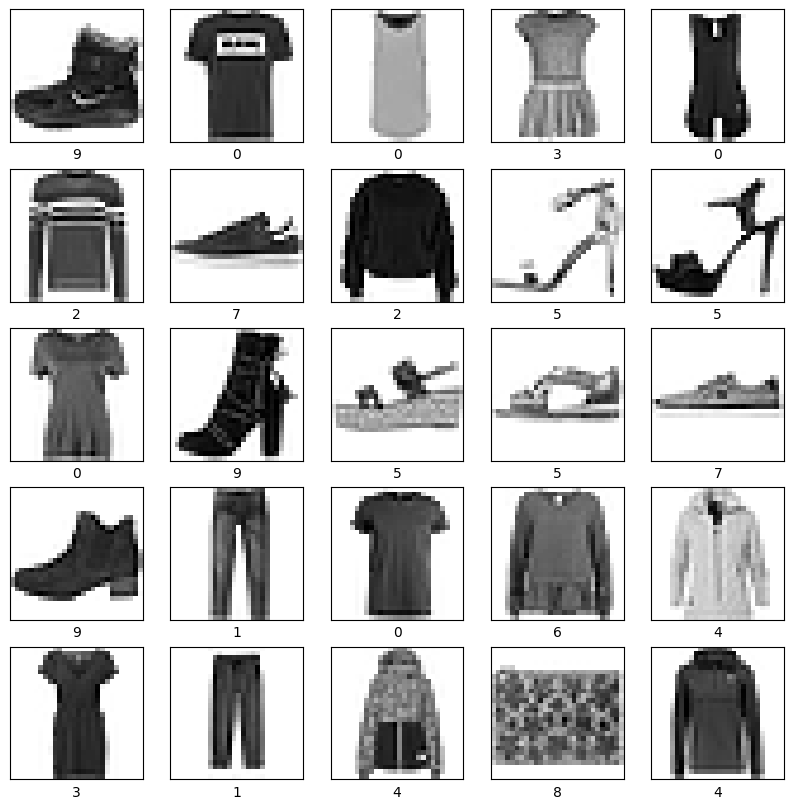

In [2]:
mnist = tensorflow.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train.reshape(-1, 28, 28, 1))

augmented_iterator = datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=32)

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(str(y_train[i]))
plt.show()

In [3]:
model1 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units= 128, activation='relu'),
    Dense(units= 64, activation='relu'),
    Dense(units= 32, activation='relu'),
    Dense(units= 10, activation='softmax')

])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [4]:
model2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units= 128, activation='relu'),
    Dense(units= 64, activation='relu'),
    Dense(units= 32, activation='relu'),
    Dense(units= 10, activation='softmax')

])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [5]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 21s 4ms/step - loss: 0.4236 - accuracy: 0.8475
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2786 - accuracy: 0.8976
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2323 - accuracy: 0.9143
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1937 - accuracy: 0.9284
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1652 - accuracy: 0.9385
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1397 - accuracy: 0.9476
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1168 - accuracy: 0.9563
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1031 - accuracy: 0.9613
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0899 - accuracy: 0.9667
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.07

In [6]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(augmented_iterator, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 27s 13ms/step - loss: 0.6228 - accuracy: 0.7636
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4603 - accuracy: 0.8239
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4128 - accuracy: 0.8439
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3830 - accuracy: 0.8553
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3661 - accuracy: 0.8621
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3494 - accuracy: 0.8695
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3374 - accuracy: 0.8725
Epoch 8/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3303 - accuracy: 0.8757
Epoch 9/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3219 - accuracy: 0.8789
Epoch 10/20
1875/1875 [==============================] - 25s 13m

313/313 [==============================] - 1s 2ms/step


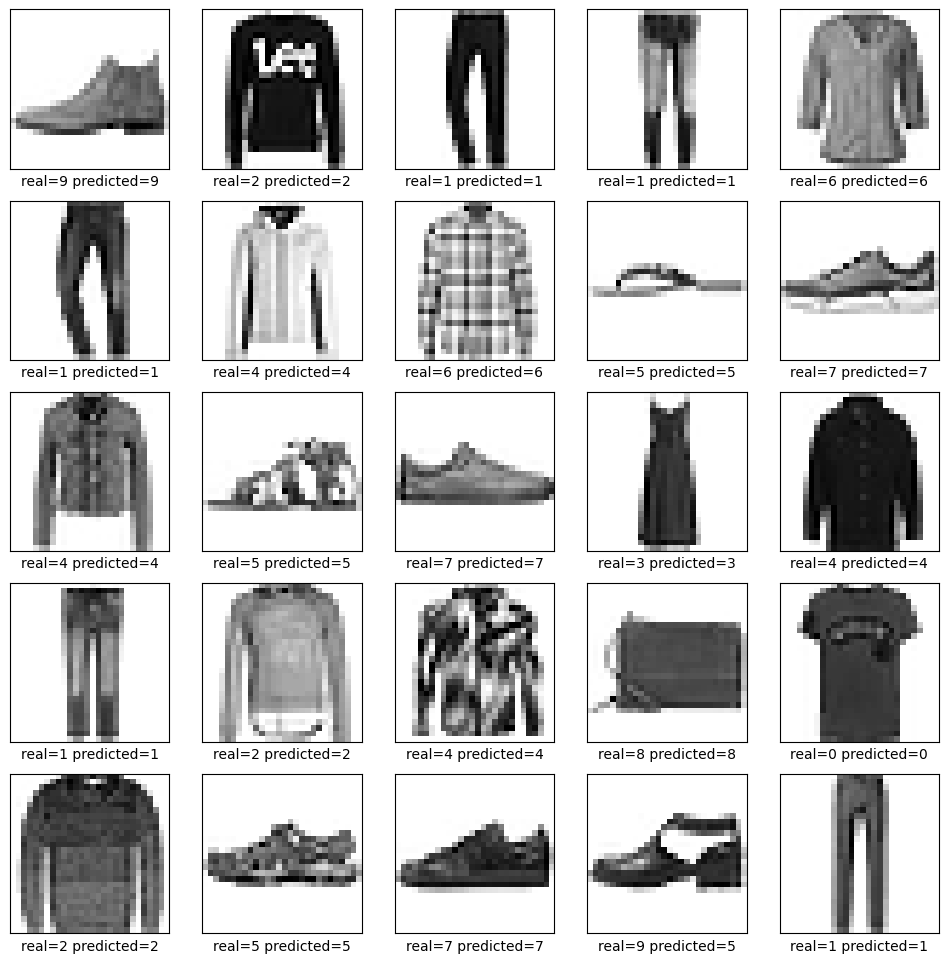

In [7]:
predict1 = model1.predict(x_test)
plt.figure(figsize=(12, 12))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel("real=" + str(y_test[i]) + ' predicted=' + str(np.argmax(predict1[i])))
plt.show()

313/313 [==============================] - 1s 2ms/step


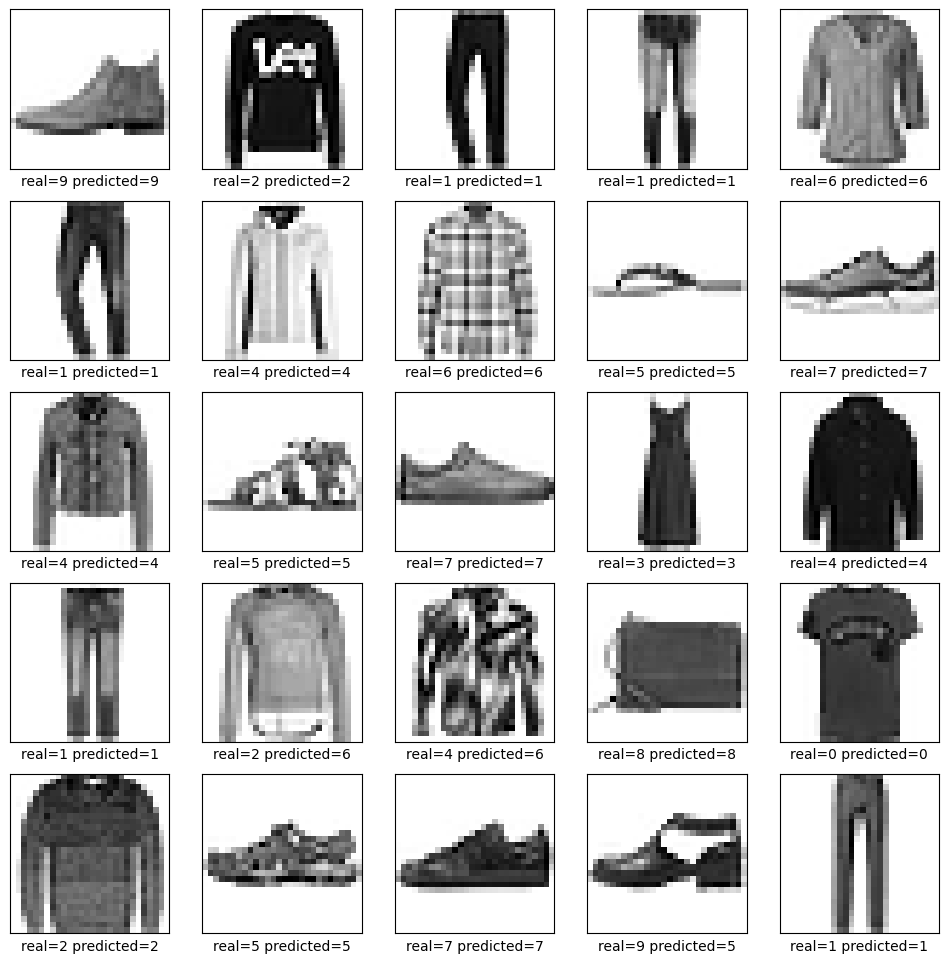

In [8]:
predict2 = model2.predict(x_test)
plt.figure(figsize=(12, 12))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel("real=" + str(y_test[i]) + ' predicted=' + str(np.argmax(predict2[i])))
plt.show()

In [9]:
out11 = model1.evaluate(x_test, y_test)

print("Model Accuracy: %.4f" % out11[1])
print("Model loss: %.4f" % out11[0])

out21 = model2.evaluate(x_test, y_test)

print("Model Accuracy: %.4f" % out21[1])
print("Model loss: %.4f" % out21[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.4864 - accuracy: 0.9146
Model Accuracy: 0.9146
Model loss: 0.4864
313/313 [==============================] - 1s 3ms/step - loss: 0.2595 - accuracy: 0.9127
Model Accuracy: 0.9127
Model loss: 0.2595


In [10]:
datagen.fit(x_test.reshape(-1, 28, 28, 1))

test_augmented = datagen.flow(x_test.reshape(-1, 28, 28, 1), y_test, batch_size=32)

out12 = model1.evaluate(test_augmented)
# print(out12)

print("Model Accuracy: %.4f" % out12[1])
print("Model Loss: %.4f" % out12[0])

out21 = model2.evaluate(test_augmented)

print("Model Accuracy: %.4f" % out21[1])
print("Model Loss: %.4f" % out21[0])

313/313 [==============================] - 4s 11ms/step - loss: 1.6317 - accuracy: 0.7029
Model Accuracy: 0.7029
Model Loss: 1.6317
313/313 [==============================] - 4s 14ms/step - loss: 0.3105 - accuracy: 0.8890
Model Accuracy: 0.8890
Model Loss: 0.3105
